# ResNet 50

In [1]:
# import the libraries as shown below

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [3]:
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

conv5_block1_out (Activation)   (None, 7, 7, 2048)   0           conv5_block1_add[0][0]           
__________________________________________________________________________________________________
conv5_block2_1_conv (Conv2D)    (None, 7, 7, 512)    1049088     conv5_block1_out[0][0]           
__________________________________________________________________________________________________
conv5_block2_1_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block2_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_1_relu (Activation (None, 7, 7, 512)    0           conv5_block2_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block2_2_conv (Conv2D)    (None, 7, 7, 512)    2359808     conv5_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_bloc

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3994 images belonging to 12 classes.
Found 756 images belonging to 12 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 24 steps
Epoch 1/10
125/125 [==============================] - 278s 2s/step - loss: 7.5338 - accuracy: 0.5656 - val_loss: 11.5510 - val_accuracy: 0.4458
Epoch 2/10
125/125 [==============================] - 254s 2s/step - loss: 3.6729 - accuracy: 0.7684 - val_loss: 22.4902 - val_accuracy: 0.3810
Epoch 3/10
125/125 [==============================] - 261s 2s/step - loss: 3.3798 - accuracy: 0.8167 - val_loss: 24.7518 - val_accuracy: 0.3889
Epoch 4/10
125/125 [==============================] - 253s 2s/step - loss: 2.4562 - accuracy: 0.8673 - val_loss: 21.1930 - val_accuracy: 0.4577
Epoch 5/10
125/125 [==============================] - 254s 2s/step - loss: 2.1697 - accuracy: 0.8813 - val_loss: 25.3158 - val_accuracy: 0.4325
Epoch 6/10
125/125 [==============================] - 257s 2s/step - loss: 2.0380 - accuracy: 0.8866 - val_loss: 27.0011 - val_accuracy: 0.4894
Epoch 7/10
125/125 [=======================

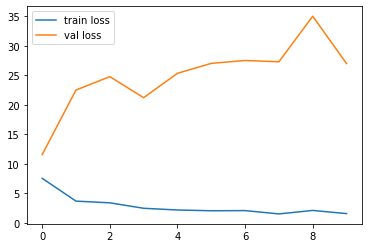

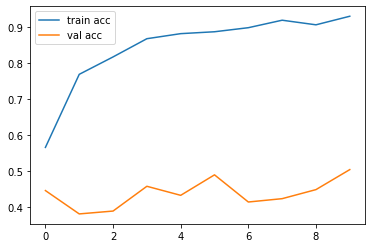

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [15]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('models/model_resnet50.h5')

In [16]:
y_pred = model.predict(test_set)

In [17]:
y_pred

array([[8.7052050e-23, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.7247656e-33, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        8.9648717e-37, 1.0000000e+00],
       [9.2280833e-27, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 6.3056587e-23],
       ...,
       [0.0000000e+00, 3.1679381e-30, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.5768796e-02],
       [8.9792047e-21, 2.4185152e-31, 5.1079411e-16, ..., 7.6568222e-23,
        4.2353521e-34, 3.8486008e-27],
       [1.3763336e-31, 5.4138101e-38, 0.0000000e+00, ..., 0.0000000e+00,
        4.0573241e-31, 3.8174311e-13]], dtype=float32)

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([ 6, 11,  6,  3,  3,  3,  6,  3, 10,  3, 10,  0,  9,  9,  3,  5,  1,
        9, 11,  0,  9,  0, 10,  0,  3,  5, 10, 11, 10, 11,  6,  3, 11, 10,
       11,  3, 11, 11, 11,  6, 10, 11,  3, 11,  3,  8, 10, 10,  3,  0, 11,
        3,  5, 11,  3, 10,  3,  8,  6, 11,  9,  8,  0,  3, 10,  8, 10,  3,
        3,  7, 11,  3, 11, 10,  3,  3,  7,  3,  3,  8, 11, 10, 11,  3,  0,
        1,  3,  3,  8,  9,  7,  3, 10,  6,  1,  5, 10,  3,  6,  3,  3,  6,
        1,  6,  1, 10,  3,  3,  3, 10, 10,  3,  3,  6,  3, 11,  8,  8,  3,
       10,  3,  9,  7, 11,  0,  3,  5,  6,  9, 11,  3,  3,  8, 10,  5,  6,
        3, 10,  5,  3,  0,  9, 11,  3,  6,  0,  3,  8,  8,  8, 10,  3,  3,
        0, 10,  9,  0,  8,  6,  3,  9,  0,  3, 11,  6,  9,  3,  0,  8,  3,
        7,  1,  9, 10,  5, 11,  8, 10,  8,  5,  3,  0, 11, 10,  7,  5, 10,
        6,  9,  8,  5, 10,  7, 10,  1, 11,  0,  1,  1,  0,  3,  3, 11,  8,
        6,  5,  1,  0,  0,  9, 11,  7, 10, 10,  7,  0,  3, 10,  1, 11,  3,
        0,  1,  9, 10, 10

In [18]:
model = load_model('models/model_resnet50.h5')
test_image = image.load_img('cleavers.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
y_pred = model.predict(test_image)
result = np.argmax(y_pred, axis=1)
result

array([5], dtype=int64)

# Inception V3

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [3]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

average_pooling2d_7 (AveragePoo (None, 5, 5, 1280)   0           mixed8[0][0]                     
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 5, 5, 320)    409600      mixed8[0][0]                     
__________________________________________________________________________________________________
batch_normalization_78 (BatchNo (None, 5, 5, 384)    1152        conv2d_78[0][0]                  
__________________________________________________________________________________________________
batch_normalization_79 (BatchNo (None, 5, 5, 384)    1152        conv2d_79[0][0]                  
__________________________________________________________________________________________________
batch_normalization_82 (BatchNo (None, 5, 5, 384)    1152        conv2d_82[0][0]                  
__________________________________________________________________________________________________
batch_norm

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3994 images belonging to 12 classes.
Found 756 images belonging to 12 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 24 steps
Epoch 1/10
125/125 [==============================] - 237s 2s/step - loss: 3.7325 - accuracy: 0.4717 - val_loss: 10.8774 - val_accuracy: 0.2421
Epoch 2/10
125/125 [==============================] - 227s 2s/step - loss: 2.0855 - accuracy: 0.6385 - val_loss: 10.0289 - val_accuracy: 0.2646
Epoch 3/10
125/125 [==============================] - 235s 2s/step - loss: 1.8751 - accuracy: 0.6903 - val_loss: 10.1698 - val_accuracy: 0.3386
Epoch 4/10
125/125 [==============================] - 240s 2s/step - loss: 1.9735 - accuracy: 0.7086 - val_loss: 11.8769 - val_accuracy: 0.2897
Epoch 5/10
125/125 [==============================] - 325s 3s/step - loss: 1.7205 - accuracy: 0.7379 - val_loss: 14.8357 - val_accuracy: 0.2368
Epoch 6/10
125/125 [==============================] - 195s 2s/step - loss: 1.5645 - accuracy: 0.7611 - val_loss: 15.9356 - val_accuracy: 0.2672
Epoch 7/10
125/125 [=======================

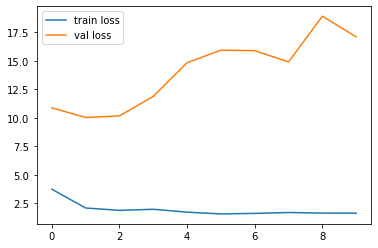

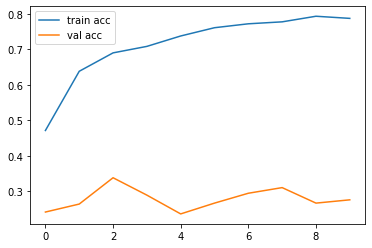

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [16]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('models/model_inceptionv3.h5')

In [17]:
y_pred = model.predict(test_set)

In [18]:
y_pred

array([[1.25336774e-12, 2.92595646e-13, 2.24592867e-07, ...,
        5.49304423e-18, 6.26072003e-20, 4.74385709e-01],
       [1.21192854e-17, 3.22971582e-01, 2.03364491e-01, ...,
        3.95661637e-09, 1.08322274e-04, 1.35787368e-20],
       [5.30658700e-29, 7.27664829e-18, 9.99991655e-01, ...,
        7.32303107e-13, 2.13376387e-16, 2.65447897e-16],
       ...,
       [5.47571649e-16, 2.09255951e-20, 2.10994713e-05, ...,
        5.10293215e-25, 6.36358820e-22, 3.52895357e-09],
       [4.67581245e-16, 1.20355875e-15, 1.69093313e-03, ...,
        5.51289418e-07, 1.55825196e-11, 6.65402233e-10],
       [4.36427790e-24, 6.10929468e-36, 1.00000000e+00, ...,
        2.52911363e-28, 1.04360161e-32, 1.68191329e-11]], dtype=float32)

In [19]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_pred

array([11,  3,  2,  2,  2,  2,  2,  2,  5,  5,  2,  2,  2,  3,  9,  2, 11,
        5,  6,  3,  2,  8,  2,  3,  5,  2,  2,  2,  3,  5,  5,  3,  3,  5,
        3,  3, 11,  3,  6,  2,  3,  5,  3,  3,  2,  2,  2, 10,  8,  3,  3,
       10,  5, 11, 10, 11,  3,  2,  2,  2,  2,  2,  3,  3,  5,  6,  6,  3,
        2,  3,  3, 11,  5,  3,  5,  2,  3,  3,  2,  3,  3,  3,  3,  2, 11,
       11,  3,  3,  3,  2,  3,  2,  2,  3,  2,  8,  2,  3,  5, 11,  3, 11,
        3,  2,  3,  3,  2,  6,  3, 11,  3,  5,  2,  8,  4,  2,  3,  3,  3,
        2,  3, 11,  2,  3,  6,  3,  2,  2,  8,  3,  3, 11,  3,  3,  8, 11,
       11,  3,  3,  2,  1,  8,  6, 11,  6,  8,  5,  3,  3,  4,  8,  0,  3,
        2,  2,  8,  6,  8,  3,  3,  3,  3,  3,  3,  8,  3,  8,  3, 11,  5,
        3,  2,  6,  3,  8,  3,  8,  2,  2, 11,  3,  8,  2,  2,  3,  5, 11,
        3,  3,  5,  3,  3,  1,  2,  8,  2,  3,  2,  6,  6,  2,  3,  2,  2,
        3,  2,  2,  3, 11,  3,  3,  3,  5,  2,  8,  5,  3,  2,  3,  8,  2,
        3,  3,  2,  6,  3

In [30]:
model = load_model('models/model_inceptionv3.h5')
test_image = image.load_img('cleavers.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
y_pred = model.predict(test_image)
result = np.argmax(y_pred, axis=1)
result

array([9], dtype=int64)

# VGG 16

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# useful for getting number of classes
folders = glob('train/*')
print(len(folders))

12


In [6]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [9]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [10]:
train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3994 images belonging to 12 classes.
Found 756 images belonging to 12 classes.


In [11]:
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set))

Epoch 1/10
125/125 [==============================] - 400s 3s/step - loss: 7.4728 - accuracy: 0.5228 - val_loss: 6.8150 - val_accuracy: 0.6376
Epoch 2/10
125/125 [==============================] - 358s 3s/step - loss: 3.8327 - accuracy: 0.7511 - val_loss: 6.0942 - val_accuracy: 0.6587
Epoch 3/10
125/125 [==============================] - 358s 3s/step - loss: 3.1212 - accuracy: 0.8045 - val_loss: 13.7175 - val_accuracy: 0.6442
Epoch 4/10
125/125 [==============================] - 357s 3s/step - loss: 2.5534 - accuracy: 0.8380 - val_loss: 5.3316 - val_accuracy: 0.6944
Epoch 5/10
125/125 [==============================] - 356s 3s/step - loss: 2.1534 - accuracy: 0.8665 - val_loss: 7.6971 - val_accuracy: 0.6812
Epoch 6/10
125/125 [==============================] - 357s 3s/step - loss: 1.8511 - accuracy: 0.8846 - val_loss: 5.7640 - val_accuracy: 0.7077
Epoch 7/10
125/125 [==============================] - 357s 3s/step - loss: 1.8483 - accuracy: 0.8876 - val_loss: 1.1060 - val_accuracy: 0.750

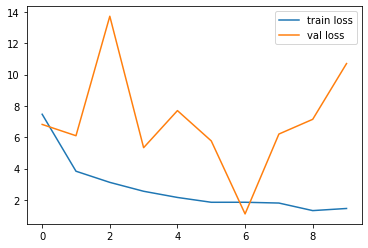

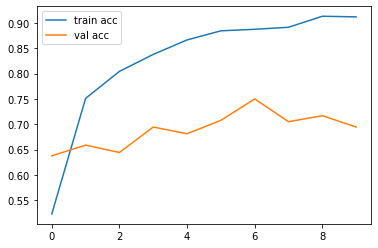

In [12]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [13]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('models/model_vgg16.h5')

In [14]:
y_pred = model.predict(test_set)

In [15]:
y_pred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.8699907e-19, 1.9037437e-23, 9.9977201e-01, ..., 5.1060134e-20,
        1.0103215e-18, 1.3198758e-18],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.2468858e-34, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.7886728e-23],
       [0.0000000e+00, 3.2460327e-29, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.8019916e-38]], dtype=float32)

In [16]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_pred

array([ 0,  2,  7, 10,  7,  1, 11,  3,  4,  3, 11,  5,  8, 11,  1,  6,  2,
        0,  1, 11,  3, 10, 11,  7,  1,  5, 11, 11,  1,  8,  6,  6,  6,  4,
        8,  3,  5,  6,  7,  2,  3,  8,  6,  3,  6,  7,  0,  4,  8,  0,  3,
        1,  5,  1,  1,  0,  6, 11,  1,  6,  3,  3,  5,  2,  1,  0,  3,  3,
        8,  6,  4, 10,  1, 11,  8, 11, 11,  8,  1,  3, 11,  4, 10,  6,  5,
        6, 11,  1, 10,  7,  6,  6,  8,  2,  7,  6,  7, 11,  8,  4,  6,  1,
        5, 10, 11,  0,  0, 10,  4,  9,  8, 11,  4,  3,  4,  2, 11,  2,  0,
        4,  7,  8,  7, 10,  8,  8, 10,  5,  5,  8,  0,  6,  6, 10,  3, 10,
       10,  7, 10,  9,  2,  8,  8, 11,  1,  1, 10,  5,  0,  8,  8,  1,  8,
       11,  4,  2, 11,  1,  3,  1,  6,  3,  5, 11,  0, 10, 11,  3,  7,  5,
        6,  7, 11, 11,  8,  5, 10,  3,  7,  0, 11,  8,  5,  7,  9,  3,  3,
        8,  6,  8,  3,  1, 10,  3, 11,  1,  2,  8,  7,  1,  6,  4,  3, 11,
       11,  6,  3,  6,  3,  1, 11, 10,  3,  7,  8,  2,  1,  3,  1,  4,  6,
        8,  9,  5,  6,  8

In [17]:
model = load_model('models/model_vgg16.h5')
test_image = image.load_img('cleavers.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
y_pred = model.predict(test_image)
result = np.argmax(y_pred, axis=1)
result

array([2], dtype=int64)

# VGG 19

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 14s 0us/step


In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# useful for getting number of classes
folders = glob('train/*')
print(len(folders))

12


In [6]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [9]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [10]:
train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3994 images belonging to 12 classes.
Found 756 images belonging to 12 classes.


In [11]:
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set))

Epoch 1/10
125/125 [==============================] - 461s 4s/step - loss: 6.9740 - accuracy: 0.5418 - val_loss: 3.5350 - val_accuracy: 0.6918
Epoch 2/10
125/125 [==============================] - 416s 3s/step - loss: 3.3934 - accuracy: 0.7677 - val_loss: 2.3585 - val_accuracy: 0.6892
Epoch 3/10
125/125 [==============================] - 416s 3s/step - loss: 2.7378 - accuracy: 0.8152 - val_loss: 2.4266 - val_accuracy: 0.7156
Epoch 4/10
125/125 [==============================] - 416s 3s/step - loss: 2.5694 - accuracy: 0.8320 - val_loss: 5.4299 - val_accuracy: 0.6640
Epoch 5/10
125/125 [==============================] - 416s 3s/step - loss: 2.1290 - accuracy: 0.8653 - val_loss: 5.7864 - val_accuracy: 0.6786
Epoch 6/10
125/125 [==============================] - 416s 3s/step - loss: 1.7961 - accuracy: 0.8868 - val_loss: 5.0924 - val_accuracy: 0.7063
Epoch 7/10
125/125 [==============================] - 416s 3s/step - loss: 1.8118 - accuracy: 0.8903 - val_loss: 2.0225 - val_accuracy: 0.7143

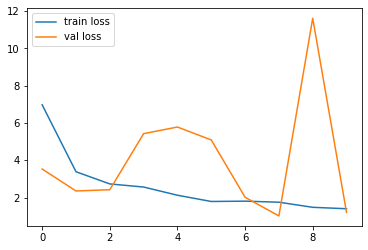

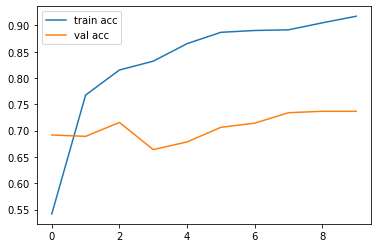

<Figure size 432x288 with 0 Axes>

In [12]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [13]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('models/model_vgg19.h5')

In [14]:
y_pred = model.predict(test_set)
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        5.8009449e-33, 0.0000000e+00],
       [1.5274113e-34, 0.0000000e+00, 6.3820163e-32, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 8.1047041e-24],
       ...,
       [4.0491563e-14, 0.0000000e+00, 1.0494533e-11, ..., 7.1538877e-21,
        1.3552081e-15, 2.5513414e-29],
       [3.5229567e-36, 3.2619759e-33, 1.4989040e-02, ..., 9.6143744e-08,
        9.8501080e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.6923915e-29,
        0.0000000e+00, 4.2162150e-38]], dtype=float32)

In [15]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_pred

array([ 9, 11,  3,  8,  1,  0,  6,  9,  3,  6, 10,  6,  7,  1,  5,  6,  9,
       10, 10, 10,  8,  0,  8,  3,  5,  0, 11,  7,  8,  6,  0, 10,  7,  0,
        4,  5,  1,  5,  4,  3,  9,  5,  1,  4,  0,  8,  8,  9,  0, 10,  3,
        6,  8,  3,  2, 11, 11,  1,  5,  6,  8,  9,  2,  0,  9, 11,  5,  7,
        2,  6, 11,  8,  5,  1,  7,  5,  6,  8,  4,  2,  5,  9, 11,  0,  5,
        7,  1,  1,  2,  9,  9,  8,  3, 11,  6,  1,  7,  7,  9, 10,  0, 10,
       10, 11,  6, 11, 11,  2,  6,  6,  6,  5,  6, 11,  5,  5, 11,  9,  1,
        5,  4,  1,  1,  1,  2, 11,  0,  6,  2,  2, 11,  7,  0,  1,  6,  7,
        5,  6,  2, 10,  6,  4,  7,  3,  5,  6,  2,  5,  7,  6,  9,  5,  6,
       10,  7,  6, 11,  7,  2,  5, 10, 10,  7,  5,  8,  8,  1,  9,  0,  0,
        0,  3,  3,  7,  2,  6,  8,  8, 11, 11,  7,  6,  5,  8,  7,  8,  9,
        5, 10,  3, 10, 10,  2,  7,  6,  9,  9,  9,  8,  6,  7,  0,  8,  9,
        4,  6, 11,  7,  0, 11,  7,  6,  0,  5,  7,  8,  8,  0,  2, 11,  0,
        6,  8,  4,  8,  2

In [32]:
model = load_model('models/model_vgg19.h5')
test_image = image.load_img('cleavers.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
y_pred = model.predict(test_image)
result = np.argmax(y_pred, axis=1)
result

array([2], dtype=int64)

# Xception

In [1]:
# import the libraries as shown below

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [5]:
# Here we will be using imagenet weights
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 14s 0us/step


In [6]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of classes
folders = glob('train/*')
print(len(folders))

12


In [8]:
x = Flatten()(xception.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=xception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

__________________________________________________________________________________________________
block5_sepconv2 (SeparableConv2 (None, 14, 14, 728)  536536      block5_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 14, 14, 728)  2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, 14, 14, 728)  0           block5_sepconv2_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv3 (SeparableConv2 (None, 14, 14, 728)  536536      block5_sepconv3_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv3_bn (BatchNormal (None, 14, 14, 728)  2912        block5_sepconv3[0][0]            
__________

__________________________________________________________________________________________________
block14_sepconv1 (SeparableConv (None, 7, 7, 1536)   1582080     add_23[0][0]                     
__________________________________________________________________________________________________
block14_sepconv1_bn (BatchNorma (None, 7, 7, 1536)   6144        block14_sepconv1[0][0]           
__________________________________________________________________________________________________
block14_sepconv1_act (Activatio (None, 7, 7, 1536)   0           block14_sepconv1_bn[0][0]        
__________________________________________________________________________________________________
block14_sepconv2 (SeparableConv (None, 7, 7, 2048)   3159552     block14_sepconv1_act[0][0]       
__________________________________________________________________________________________________
block14_sepconv2_bn (BatchNorma (None, 7, 7, 2048)   8192        block14_sepconv2[0][0]           
__________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3994 images belonging to 12 classes.
Found 756 images belonging to 12 classes.


In [13]:
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 24 steps
Epoch 1/10
125/125 [==============================] - 321s 3s/step - loss: 3.2234 - accuracy: 0.5215 - val_loss: 7.7461 - val_accuracy: 0.2738
Epoch 2/10
125/125 [==============================] - 301s 2s/step - loss: 2.0252 - accuracy: 0.6855 - val_loss: 12.7069 - val_accuracy: 0.2579
Epoch 3/10
125/125 [==============================] - 301s 2s/step - loss: 1.6685 - accuracy: 0.7504 - val_loss: 9.3709 - val_accuracy: 0.3214
Epoch 4/10
125/125 [==============================] - 301s 2s/step - loss: 1.5346 - accuracy: 0.7702 - val_loss: 8.0621 - val_accuracy: 0.3386
Epoch 5/10
125/125 [==============================] - 301s 2s/step - loss: 1.3242 - accuracy: 0.7977 - val_loss: 8.4008 - val_accuracy: 0.3294
Epoch 6/10
125/125 [==============================] - 301s 2s/step - loss: 1.3739 - accuracy: 0.8030 - val_loss: 11.6162 - val_accuracy: 0.3056
Epoch 7/10
125/125 [===========================

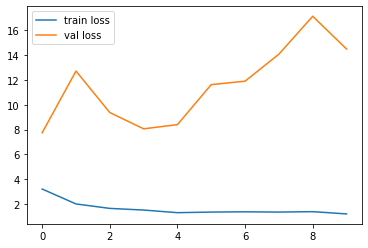

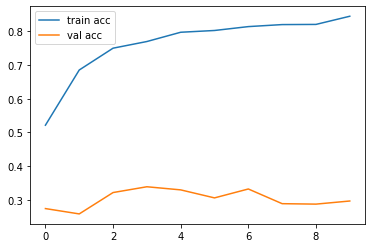

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [15]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('models/model_xception.h5')

In [16]:
y_pred = model.predict(test_set)
y_pred

array([[1.7977596e-35, 1.4975605e-14, 9.9999976e-01, ..., 2.7585699e-07,
        3.9965898e-21, 1.4607302e-30],
       [7.3482945e-21, 3.1352722e-19, 1.3852718e-03, ..., 6.3816828e-05,
        2.3877960e-09, 8.0780509e-14],
       [0.0000000e+00, 1.0255469e-07, 7.0948452e-08, ..., 3.2040753e-31,
        1.0261822e-27, 4.0480602e-01],
       ...,
       [0.0000000e+00, 1.0761881e-30, 3.6430287e-24, ..., 4.5565971e-20,
        1.2280959e-27, 5.9926424e-20],
       [1.8506545e-17, 2.6678347e-22, 1.7946312e-04, ..., 3.2835940e-01,
        7.6808556e-16, 2.0148724e-13],
       [2.1061659e-28, 1.0506950e-24, 9.9999511e-01, ..., 2.7115907e-06,
        2.1660660e-06, 6.4953763e-19]], dtype=float32)

In [17]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_pred

array([ 2,  8,  5,  9,  9,  1,  9,  3, 11,  2,  5,  3,  9, 10, 10,  2,  8,
        9,  3,  9,  9, 10,  9, 10,  3,  8, 10, 10,  8,  8,  3, 11,  3, 10,
        8,  8,  3,  2, 11,  8,  9,  7,  8, 11, 10,  9,  1,  3,  5,  3, 10,
       11,  8,  3, 10,  8, 10,  9,  8,  5,  5, 10,  2,  3,  4,  8,  3,  8,
        9,  3,  2, 10,  7,  2,  5, 11,  3,  1,  8,  8,  8,  9, 10,  9,  5,
       10,  7, 10,  9,  2,  3, 11,  8,  2,  6,  2,  3,  3, 11,  3,  3, 10,
        8,  9,  8,  8,  3,  6, 11,  3,  9,  3, 10,  1, 10,  8,  1, 10,  2,
        2,  9,  5,  8,  3, 10, 10, 10, 10,  5,  8,  4,  8,  2,  3,  2, 11,
        9,  8,  8,  3, 10,  3,  8,  3,  8,  2,  9, 11,  2,  8, 11, 10,  3,
        8,  2,  8,  5,  6,  8,  2,  5, 10, 10,  9,  3,  7, 10,  1,  8,  8,
        9,  9,  3,  3, 10,  8,  9,  9,  3,  5,  9,  8,  8,  6,  8,  3,  2,
        2, 10,  3,  8,  8,  3,  9,  9,  8,  3,  5,  3,  8,  6, 10,  6,  3,
        8, 10,  5,  3, 11,  3,  8,  9,  9,  8, 11,  3,  8,  9, 10,  4,  3,
       10,  9,  3, 10,  3

In [33]:
model = load_model('models/model_xception.h5')
test_image = image.load_img('cleavers.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
y_pred = model.predict(test_image)
result = np.argmax(y_pred, axis=1)
result

array([6], dtype=int64)

# InceptionResNetV2

In [1]:
# import the libraries as shown below

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [3]:
# Here we will be using imagenet weights
inceptionresnet = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inceptionresnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of classes
folders = glob('train/*')
print(len(folders))

12


In [6]:
x = Flatten()(inceptionresnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inceptionresnet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

__________________________________________________________________________________________________
batch_normalization_76 (BatchNo (None, 12, 12, 192)  576         conv2d_76[0][0]                  
__________________________________________________________________________________________________
batch_normalization_79 (BatchNo (None, 12, 12, 192)  576         conv2d_79[0][0]                  
__________________________________________________________________________________________________
activation_76 (Activation)      (None, 12, 12, 192)  0           batch_normalization_76[0][0]     
__________________________________________________________________________________________________
activation_79 (Activation)      (None, 12, 12, 192)  0           batch_normalization_79[0][0]     
__________________________________________________________________________________________________
block17_1_mixed (Concatenate)   (None, 12, 12, 384)  0           activation_76[0][0]              
          

__________________________________________________________________________________________________
batch_normalization_122 (BatchN (None, 12, 12, 160)  480         conv2d_122[0][0]                 
__________________________________________________________________________________________________
activation_122 (Activation)     (None, 12, 12, 160)  0           batch_normalization_122[0][0]    
__________________________________________________________________________________________________
conv2d_120 (Conv2D)             (None, 12, 12, 192)  208896      block17_11_ac[0][0]              
__________________________________________________________________________________________________
conv2d_123 (Conv2D)             (None, 12, 12, 192)  215040      activation_122[0][0]             
__________________________________________________________________________________________________
batch_normalization_120 (BatchN (None, 12, 12, 192)  576         conv2d_120[0][0]                 
__________

__________________________________________________________________________________________________
activation_168 (Activation)     (None, 5, 5, 192)    0           batch_normalization_168[0][0]    
__________________________________________________________________________________________________
conv2d_169 (Conv2D)             (None, 5, 5, 224)    129024      activation_168[0][0]             
__________________________________________________________________________________________________
batch_normalization_169 (BatchN (None, 5, 5, 224)    672         conv2d_169[0][0]                 
__________________________________________________________________________________________________
activation_169 (Activation)     (None, 5, 5, 224)    0           batch_normalization_169[0][0]    
__________________________________________________________________________________________________
conv2d_167 (Conv2D)             (None, 5, 5, 192)    399360      block8_1_ac[0][0]                
__________

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [9]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [10]:
train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3994 images belonging to 12 classes.
Found 756 images belonging to 12 classes.


In [11]:
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 24 steps
Epoch 1/10
125/125 [==============================] - 429s 3s/step - loss: 2.1803 - accuracy: 0.5325 - val_loss: 6.8147 - val_accuracy: 0.2937
Epoch 2/10
125/125 [==============================] - 388s 3s/step - loss: 1.2530 - accuracy: 0.7153 - val_loss: 11.0595 - val_accuracy: 0.2765
Epoch 3/10
125/125 [==============================] - 388s 3s/step - loss: 0.9499 - accuracy: 0.7879 - val_loss: 12.9095 - val_accuracy: 0.2288
Epoch 4/10
125/125 [==============================] - 389s 3s/step - loss: 0.9372 - accuracy: 0.7972 - val_loss: 15.7551 - val_accuracy: 0.2712
Epoch 5/10
125/125 [==============================] - 389s 3s/step - loss: 0.8909 - accuracy: 0.8157 - val_loss: 15.5975 - val_accuracy: 0.2368
Epoch 6/10
125/125 [==============================] - 388s 3s/step - loss: 0.8034 - accuracy: 0.8365 - val_loss: 12.8174 - val_accuracy: 0.2910
Epoch 7/10
125/125 [========================

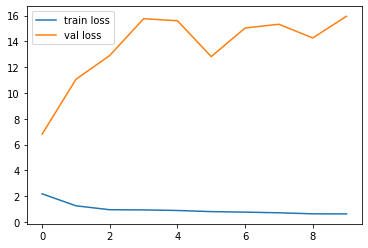

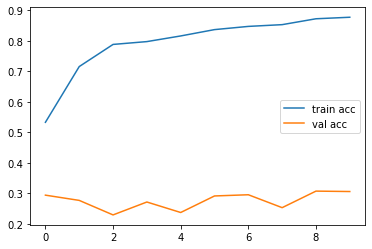

In [12]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [13]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('models/model_inceptionresnet.h5')

In [14]:
y_pred = model.predict(test_set)
y_pred

array([[1.47877909e-32, 3.32030439e-21, 2.69896418e-15, ...,
        2.35568893e-28, 4.92968626e-19, 9.00862277e-01],
       [1.90385108e-09, 2.43893170e-19, 2.08147891e-11, ...,
        4.68361391e-11, 9.99357998e-01, 2.47332282e-14],
       [2.44375580e-04, 8.21427911e-22, 1.50346836e-11, ...,
        3.58670255e-12, 9.00753392e-08, 7.63521329e-11],
       ...,
       [1.01791676e-12, 5.60471960e-15, 6.66386182e-11, ...,
        2.42841779e-03, 9.97564554e-01, 6.51360417e-15],
       [1.22906954e-20, 2.00453166e-16, 8.31458044e-15, ...,
        7.70705526e-08, 9.99648333e-01, 7.71564217e-16],
       [5.58321450e-16, 1.50933953e-13, 7.73576507e-03, ...,
        1.99715397e-03, 4.91298735e-02, 5.25218638e-07]], dtype=float32)

In [15]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_pred

array([11, 10,  6, 11, 10, 10,  0,  3,  0,  0,  6,  3, 10, 10, 10, 10,  8,
       10, 10, 11,  3, 10,  0, 10, 11, 10,  3,  3, 10,  0,  6, 10,  3, 11,
        6, 10, 11,  3,  0,  3, 10, 10,  3,  0, 10,  3, 10, 10, 10,  3,  0,
        5, 10,  3,  9,  3, 10, 10, 10, 11, 10,  3, 10, 10, 10,  3,  3, 10,
       10, 10, 10,  3,  6, 10,  8,  8,  2,  2, 10,  6, 10,  3,  3,  3,  6,
       10, 10, 10,  0, 10,  6,  3,  3, 10, 10,  3,  3, 10,  3, 10,  6, 10,
        3, 10,  3,  0, 10,  0,  3,  3, 10, 10,  3,  3, 10,  6,  6,  7, 11,
       10,  6,  3,  6, 10,  6, 10,  3, 10, 10,  3,  3,  3, 10, 11,  3, 10,
       10,  6, 10, 10, 10,  6, 10,  8, 10, 10, 10,  0,  4,  3,  6,  3,  0,
       11, 10, 10, 10,  3,  8,  3, 11,  0,  3, 11, 10, 11, 11,  3,  6, 10,
        3, 11, 10, 10, 10,  0,  6,  9, 10,  8, 10, 11,  6, 10, 11,  6, 10,
       10, 11,  8,  8,  0,  3,  3, 10, 10,  3, 10, 10,  3,  0, 10,  3,  5,
       10, 10,  3,  3, 10,  9,  2,  6,  8, 10,  2,  6,  0,  6,  3,  3, 11,
       11,  3, 10, 10,  6

In [34]:
model = load_model('models/model_inceptionresnet.h5')
test_image = image.load_img('cleavers.png', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
y_pred = model.predict(test_image)
result = np.argmax(y_pred, axis=1)
result

array([10], dtype=int64)